In [6]:
from src.tools import *
import sys as s
from sympy import *
from scipy.linalg import sqrtm
import numpy as np
init_printing(use_unicode=True)
from matplotlib import pyplot as plt
#%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct
from scipy.linalg import eigvals


## Função p(t)
Consideramos $\lambda = 0.01$

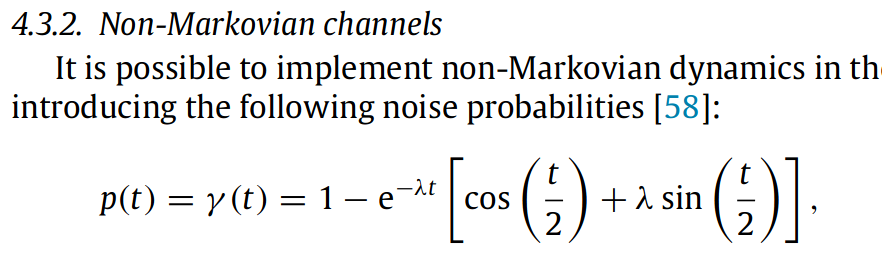

In [7]:
# implementamos essa função 
def get_list_p_noMarkov(list_p):
    lamb = 0.01
    list_p_noMarkov = []
    def non_markov_p(lamb,t):
        result = 1-(exp(-lamb*t)*(cos(t/2)+(lamb)*sin(t/2)))
        return result
    for p in list_p:
        list_p_noMarkov.append(non_markov_p(lamb,p))
    return list_p_noMarkov

## Para reproduzir esses resultados 
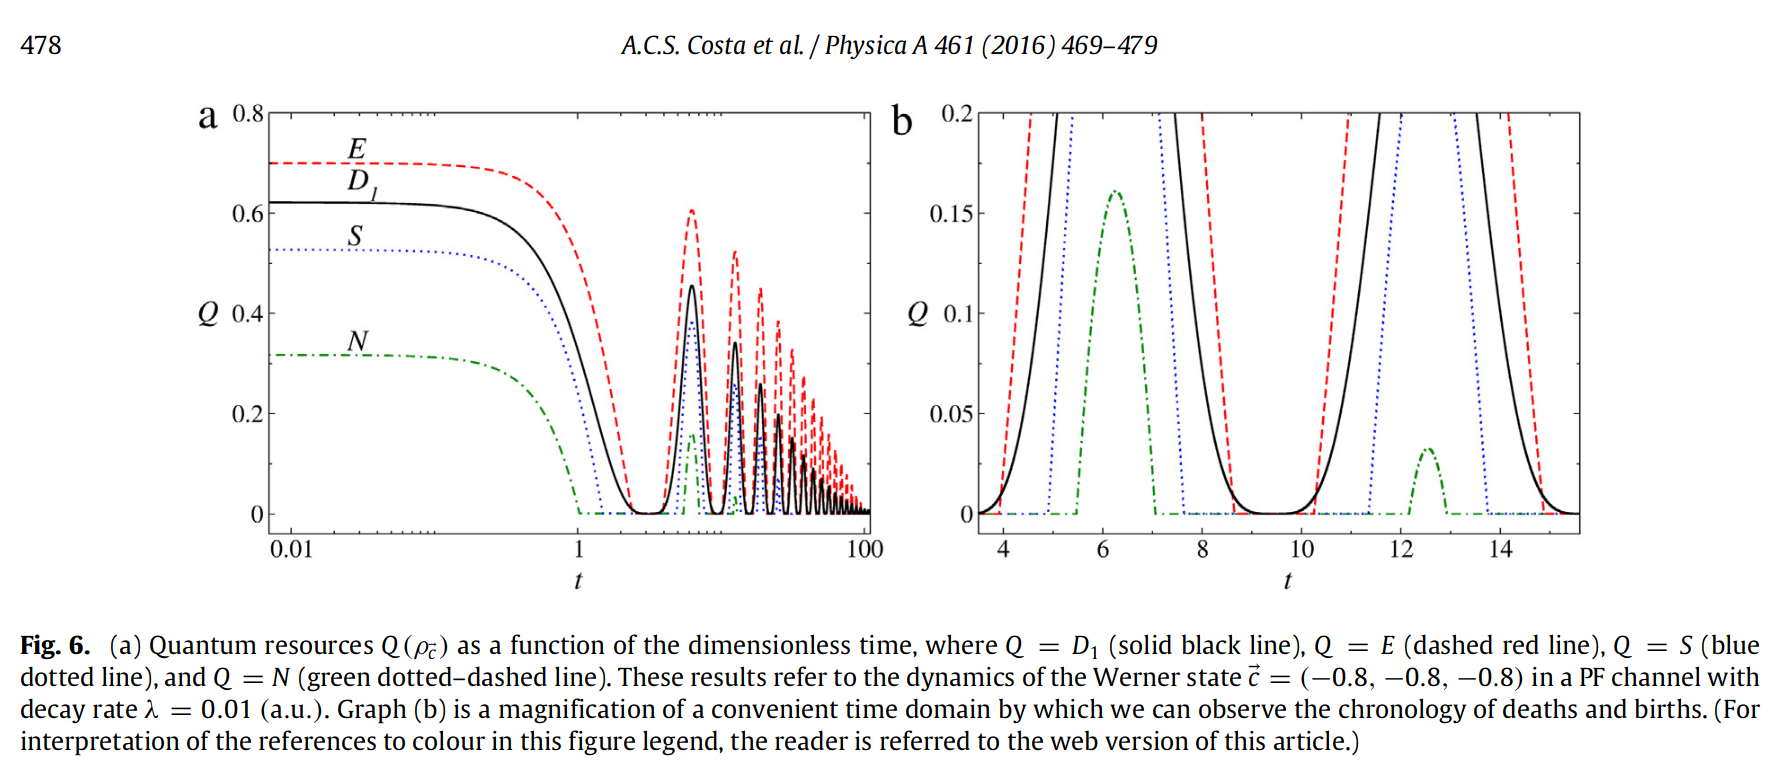

## Os estados iniciais são 
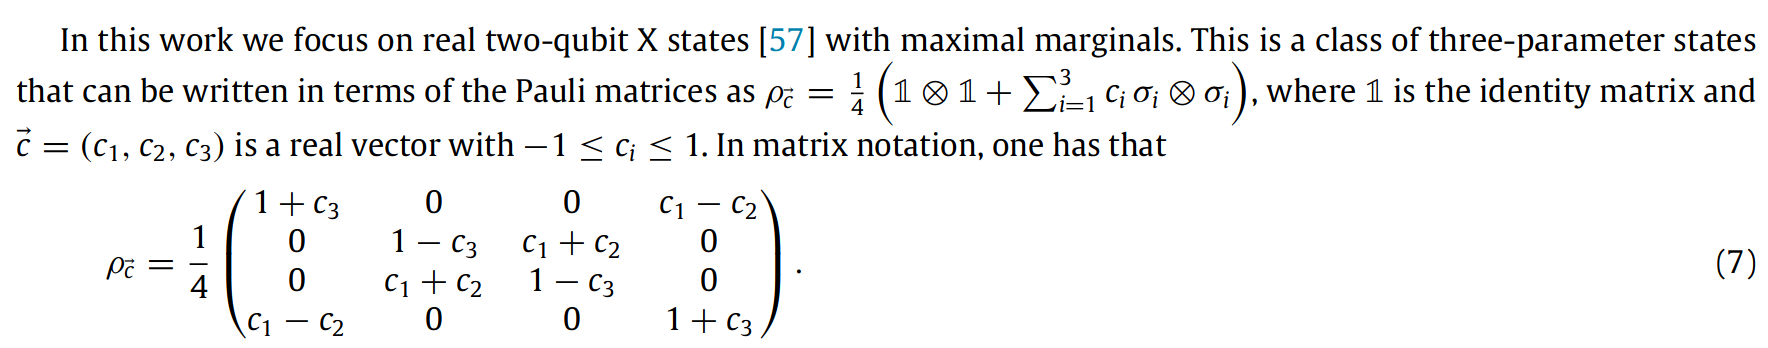

## Para os estados evoluídos tem essa transformação em função dos valores p(t)
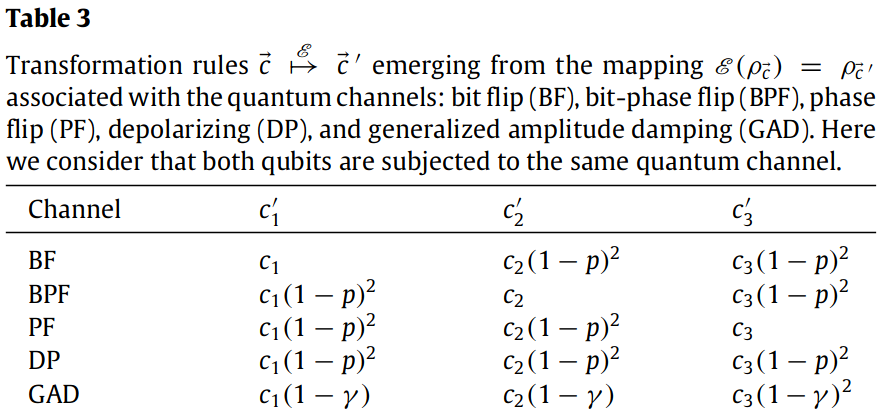

# Para reproduzir a Fig. obtemos a matriz do estado evoluido considerando o canal PF

In [8]:
def state_t(c1, c2, c3, p):
    # c = [-0.8,-0.8,-0.8]
    # c11 = c1*(1-p)**2
    # c22 = c2
    # c33 = c3*(1-p)**2
    c11 = c1*(1-p)**2
    c22 = c2*(1-p)**2
    c33 = c3
    c = [c11, c22, c33]
    index = 0
    rho = np.zeros((4,4),dtype=complex)
    for i in range(len(rho)):
        rho[i,i] = 1
    for i in c:
        index += 1
        rho += TensorProduct(i*Pauli(index),Pauli(index))
    return rho

#Também implementamos o estado inicial

def state_0(c1, c2, c3):
    # c = [-0.8,-0.8,-0.8]
    c = [c1, c2, c3]
    index = 0
    rho = np.zeros((4,4),dtype=complex)
    for i in range(len(rho)):
        rho[i,i] = 1
    for i in c:
        index += 1
        rho += TensorProduct(i*Pauli(index),Pauli(index))
    #print(np.array(rho,dtype=complex))
    return rho

### O emaranhamento é uma das funções do plot da Fig.6 que vamos implementar

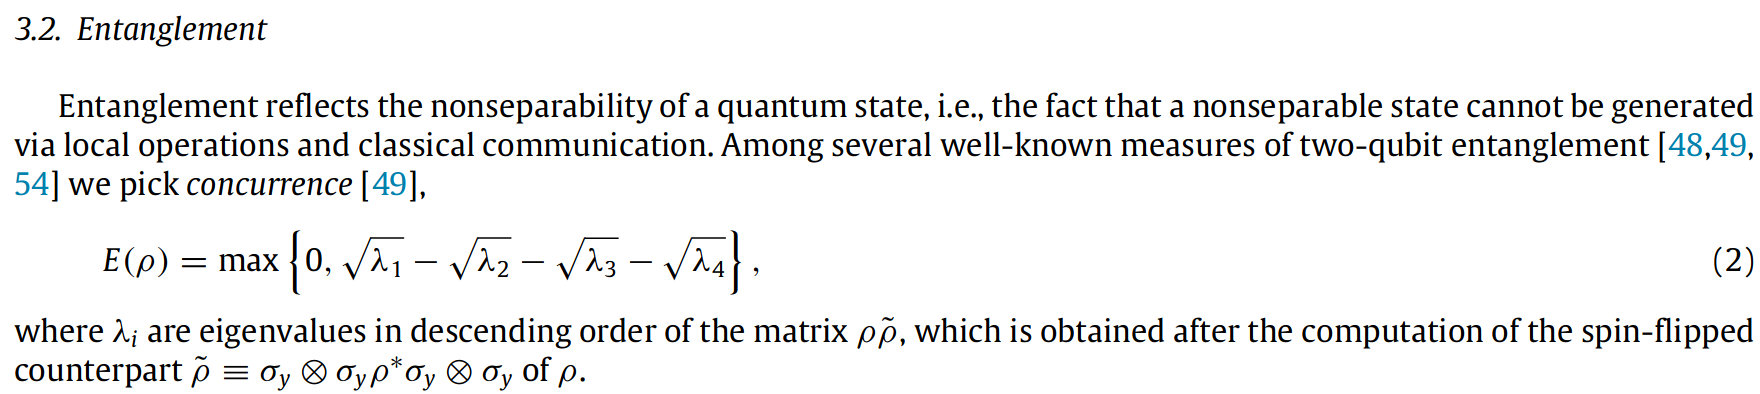

In [9]:
# função pra calcular o emaranhamento
def calculate_entanglement(rho):
    
    # Compute the spin-flipped counterpart
    sigma_y = Matrix([[0, -1j], [1j, 0]])
    rho_tilde = np.kron(sigma_y, sigma_y) @ np.conj(rho.T) @ np.kron(sigma_y, sigma_y)

    # Convert rho_tilde to a NumPy array
    rho_tilde_numpy = np.array(rho_tilde.tolist(), dtype=np.complex128)

    # Compute the eigenvalues of the modified matrix
    eigenvalues = eigvals(rho_tilde_numpy)
    eigenvalues = np.sort(eigenvalues)[::-1]  # Sort in descending order

    # Calculate the entanglement measure
    entanglement = max(0, eigenvalues[0] - eigenvalues[1] - eigenvalues[2] - eigenvalues[3])

    return entanglement

10 valores de t =  [0.01       0.21019019 0.41038038 0.61057057 0.81076076 1.01095095
 1.21114114 1.41133133 1.61152152 1.81171171]
10 valores de p(t) =  [6.24989322522973e-5, 0.00655870319580398, 0.0229580430719256, 0.0490570420374510, 0.0845560919708398, 0.129062831751577, 0.182096439392669, 0.243092791157603, 0.311410432633929, 0.386337298840283]
werner_state Matrix([[0.200000000000000, 0, 0, 0], [0, 1.80000000000000, -1.60000000000000, 0], [0, -1.60000000000000, 1.80000000000000, 0], [0, 0, 0, 0.200000000000000]])
----------------------------------
werner_state Matrix([[0.200000000000000, 0, 0, 0], [0, 1.80000000000000, -1.60000000000000, 0], [0, -1.60000000000000, 1.80000000000000, 0], [0, 0, 0, 0.200000000000000]])
(2.799999999999998+0j)


/home/v/Dissertation/env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


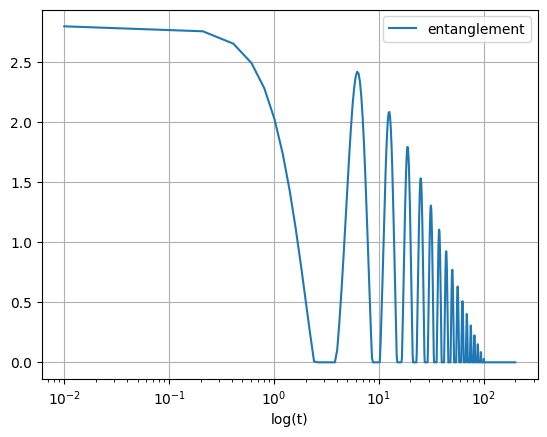

In [10]:
# célula para gerar o gráfico

T = np.linspace(0.01,200,1000)
t_A = get_list_p_noMarkov(T)
print('10 valores de t = ', T[0:10])
print('10 valores de p(t) = ', t_A[:10])

state = state_0(-0.8,-0.8,-0.8)
p=0
state2 = state_t(-0.8,-0.8,-0.8,p)
print('werner_state',state)
print('----------------------------------')
print('werner_state',state2)
print(calculate_entanglement(state2))

y3 = [calculate_entanglement(state_t(-0.8,-0.8,-0.8, i)) for i in t_A]
plt.plot(T,y3,label='entanglement')

plt.xscale('log')
plt.xlabel('log(t)')

# plt.xlim(0.01, 200)
plt.grid(True)
plt.legend()
plt.show()
